# Dynamic Optimization

Imagine an infinitely-living individual who has an endowment of capital at the beginning of each period. This endowment is used to produce more goods according, and a fraction of it depreciates. The individual then decides what fraction of the output to consume, and the remaining becomes the endowment of capital available on the next period. Notice that there is just one good in this economy, which can be consumed or used in production (as capital).

The objective in period $t$ is to *maximize* the intertemporal utility
$$U_{t} = \sum_{s=0}^{+\infty} \beta^{s}\,u(c_{t+s})$$
subject to
$$k_{t+s}\,(1-\delta) + f(k_{t+s}) = c_{t+s} + k_{t+s+1},\, t\in\mathcal{N}$$
$k_{t+s}$ is the capital stock at the beginning of period $t+s$, $c_{t+s}$ is the consumption, $f()$ is a production function, $\delta$ is the depreciation rate, and the discount rate is such that $0<\beta<1$.

According to [Bellman's Principle of Optimality](https://youtu.be/_zE5z-KZGRw) the solution to this problem must also solve
$$V(k) = \max \{u(c)+\beta\,V(k^{\prime})\}$$
$$s.t.\;k^{\prime}=f(k)+(1-\delta)k-c$$

*We want to find:*
* a *value function* $V(k)$ that satisfies the conditions above
* the associated *policy function* $h(k)$ that indicates what is the (intertemporal) optimal consumption $c$ given the amount of capital at the beginning of the period.

Functions:
* $f(k)=k^\alpha$
* $u(c)=\ln(c)$

First order condition (wrt $k^{\prime}$): $-u^{\prime}(c)+\beta\,V^{\prime}(k^{\prime})=0$

Benveniste-Scheinkman condition: $V^{\prime}(k)=u^{\prime}(c)\,(1-\delta+f^{\prime}(k))$

Re-arranging terms: 
$$k^{\prime}+c=k^{\alpha}+(1-\delta)k$$
$$c^{\prime}=\beta\,c\,\left[1-\delta+\alpha\,(k^{\prime})^{\alpha-1}\right]$$

In steady state: $c=c^{\prime}$ and $k=k^{\prime}$

$$k^{\ast}=\left[\frac{\alpha\beta}{1-\beta(1-\delta)}\right]^{\frac{1}{1-\alpha}}$$
$$c^{\ast}=(k^{\ast})^{\alpha}-\delta k^{\ast}$$

Parameters:
* $\alpha = .4$
* $\beta = .8$
* $\delta = .05$

In [2]:
import math
import numpy as np
from scipy import stats, optimize
import time
import matplotlib.pyplot as plt

In [3]:
# parameters
alpha = .4
beta = .8
delta = .05
par = (alpha, beta, delta)

In [4]:
# utility function
u = lambda c: math.log(c)

In [5]:
# production function
f = lambda k: k**alpha

In [6]:
# function to calculate distance between two lists with the same indices
def dist(V, W):
    d = 0
    for (_, v), (_, w) in zip(V.items(), W.items()):
        d = d + (v-w)**2
    return math.sqrt(d)

## Step 1: calculate steady-state

In [7]:
k_ss = (alpha*beta/(1-beta*(1-delta)))**(1/(1-alpha))
c_ss = f(k_ss)-delta*k_ss
print("steady-state values:\ncapital: {0:.1f}\nconsumption: {1:.1f}".format(k_ss, c_ss))

steady-state values:
capital: 1.6
consumption: 1.1


## Step 2: define a grid for $k$ (and $k^{\prime}$)

In [8]:
g_size = 1000
kmin = 0
kmax = k_ss*2
step = kmax/g_size

k_grid = np.arange(kmin+step, kmax+step, step)

## Step 3: define initial value function over grid

In [9]:
# V0 is dictionary. V0(k)=k
V0 = {}
for k in k_grid:
    V0[k] = math.log(k+1)

## Step 4: construct maximizer function

In [10]:
# given a value of k and a (proposed) value function V, find k' that maximizes V over grid of k.  

def maximizer(k, V0, u, f, k_grid):
    
    i = 0
    for K in k_grid:
        
        c = f(k)+(1-delta)*k-K
        if c>0:
            i += 1
            v = u(c)+beta*V0[K]
            if i == 1:
                vmax = v
                cmax = c
                kmax = K
            elif v>vmax:
                vmax = v
                cmax = c
                kmax = K
                
    return (vmax, cmax, kmax)

## Step 5: iteration over value function

In [12]:
def bellman(V0, u, f, k_grid, eps=1e-3):
    
    T = {}
    T[0] = (1, 1)
    t0 = time.time()
    d = 1
    i = 0
    
    while d>eps:
        
        V = {}
        C = {}
        K = {}
        
        i += 1
               
        for k in k_grid:
            v = maximizer(k, V0, u, f, k_grid)
            V[k] = v[0]
            C[k] = v[1]
            K[k] = v[2]
            
        d = abs(dist(V, V0))
        V0 = V
        T[i] = (d, time.time()-t0)
        print('i: {0}, d = {1:.5f} ({2:.2%})'.format(i,d,(d/T[i-1][0])-1))
        
    print('i: {0}, d = {1:.5f})'.format(i,d))
    return (V, C, K, T)

## Shazam!

In [13]:
S = bellman(V0, u, f, k_grid)

i: 1, d = 11.47116 (1047.12%)
i: 2, d = 8.71175 (-24.06%)
i: 3, d = 6.23321 (-28.45%)
i: 4, d = 4.50341 (-27.75%)
i: 5, d = 3.30647 (-26.58%)
i: 6, d = 2.46702 (-25.39%)
i: 7, d = 1.86775 (-24.29%)
i: 8, d = 1.43191 (-23.33%)
i: 9, d = 1.10911 (-22.54%)
i: 10, d = 0.86617 (-21.90%)
i: 11, d = 0.68077 (-21.40%)
i: 12, d = 0.53760 (-21.03%)
i: 13, d = 0.42600 (-20.76%)
i: 14, d = 0.33841 (-20.56%)
i: 15, d = 0.26932 (-20.42%)
i: 16, d = 0.21461 (-20.31%)
i: 17, d = 0.17118 (-20.24%)
i: 18, d = 0.13663 (-20.18%)
i: 19, d = 0.10912 (-20.14%)
i: 20, d = 0.08718 (-20.11%)
i: 21, d = 0.06967 (-20.08%)
i: 22, d = 0.05569 (-20.07%)
i: 23, d = 0.04452 (-20.05%)
i: 24, d = 0.03560 (-20.04%)
i: 25, d = 0.02847 (-20.03%)
i: 26, d = 0.02277 (-20.03%)
i: 27, d = 0.01821 (-20.02%)
i: 28, d = 0.01456 (-20.02%)
i: 29, d = 0.01165 (-20.01%)
i: 30, d = 0.00932 (-20.01%)
i: 31, d = 0.00745 (-20.01%)
i: 32, d = 0.00596 (-20.01%)
i: 33, d = 0.00477 (-20.00%)
i: 34, d = 0.00382 (-20.00%)
i: 35, d = 0.00305 (-

In [16]:
S[3]

{0: (1, 1),
 1: (11.471163339929898, 11.620864152908325),
 2: (8.711751727405229, 24.175007581710815),
 3: (6.233207992621637, 37.45667099952698),
 4: (4.503406692265431, 50.7048454284668),
 5: (3.306469822288683, 63.64902210235596),
 6: (2.467018540510849, 76.81420135498047),
 7: (1.8677475739998395, 89.01143765449524),
 8: (1.4319148954993604, 100.75852632522583),
 9: (1.1091069779636689, 113.11196255683899),
 10: (0.86616526516008, 125.26574158668518),
 11: (0.6807749115680007, 137.06682467460632),
 12: (0.5375994977798054, 148.5941891670227),
 13: (0.4260043505473527, 160.18138718605042),
 14: (0.33841249069847884, 172.33310961723328),
 15: (0.26931662426805536, 184.27857446670532),
 16: (0.21460923643192942, 196.00503754615784),
 17: (0.17117894724320826, 207.51750993728638),
 18: (0.1366336975348204, 219.02280259132385),
 19: (0.10911729721855218, 231.41397738456726),
 20: (0.08717613476214513, 243.08990097045898),
 21: (0.06966772355821278, 254.6827666759491),
 22: (0.0556881424

## Exploring the results

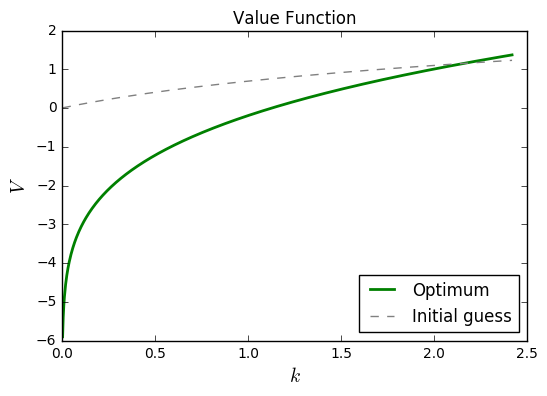

In [240]:
V = S[0]
X = []
Y = []
Z = []

for k in k_grid:
    if k < 1.5*k_ss:
        X.append(k)
        Y.append(V[k])
        Z.append(V0[k])
        
plt.plot(X, Y, color="green", linewidth=2, label="Optimum")
plt.plot(X, Z, "--", color="gray", linewidth=1, label="Initial guess")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$V$", fontsize=14)
plt.title("Value Function")
plt.legend(loc='lower right')
plt.show()

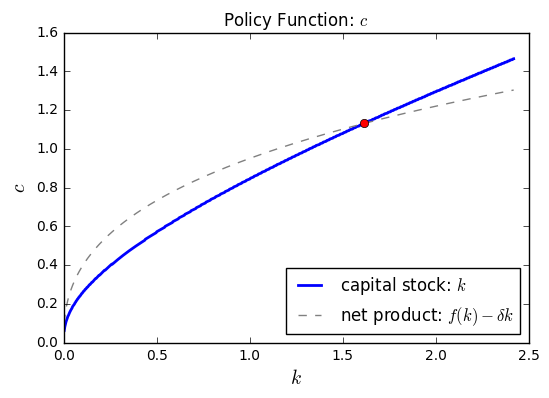

In [229]:
C = S[1]
X = []
Y = []
Z = []
for k in k_grid:
    if k < 1.5*k_ss:
        X.append(k)
        Y.append(C[k])
        Z.append(f(k)-delta*k)

plt.plot(X, Y, color="blue", linewidth=2, label="capital stock: $k$")
plt.plot(X, Z, "--", color="gray", linewidth=1, label="net product: $f(k)-\delta k$")
plt.plot([k_ss], [c_ss], marker='o', color='r')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$c$", fontsize=14)
plt.title("Policy Function: $c$")
plt.legend(loc='lower right')
plt.show()

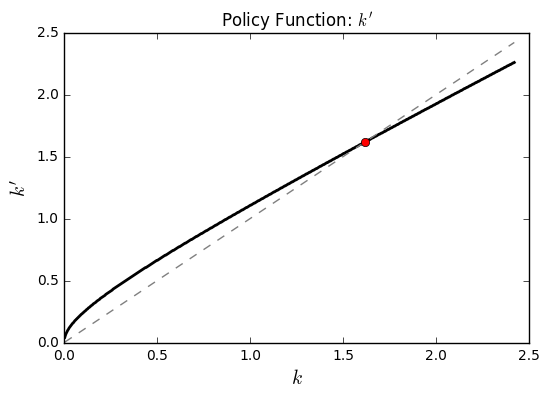

In [220]:
K = S[2]
X = []
Y = []

for k in k_grid:
    if k < 1.5*k_ss:
        X.append(k)
        Y.append(K[k])

plt.plot(X, Y, color="black", linewidth=2)
plt.plot(X, X, "--", color="gray", linewidth=1)
plt.plot([k_ss], [k_ss], marker='o', color='r')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("$k^{\prime}$", fontsize=14)
plt.title("Policy Function: $k^{\prime}$")
plt.show()

## Simulation

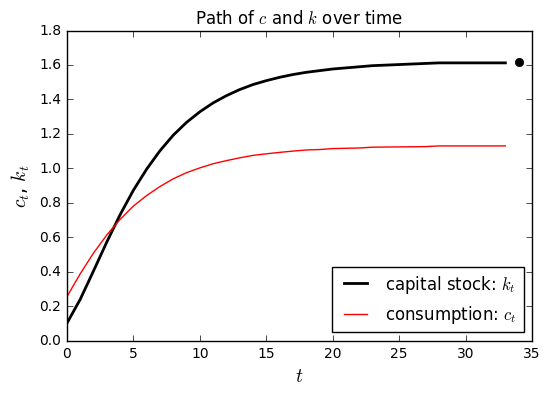

In [234]:
C = S[1]
K = S[2]

k0 = k_grid[30]
X = [k0]
Y = [C[k0]]
T = [0]

s = 0
t = 1
while s<5:
    T.append(t)
    k = K[k0]
    X.append(k)
    c = C[k]
    Y.append(c)
    if k0 == k:
        s += 1
    k0 = k
    t += 1
    
plt.plot(T, X, color="black", linewidth=2, label="capital stock: $k_{t}$")
plt.plot(T, Y, color="red", linewidth=1, label="consumption: $c_{t}$")
plt.plot([t], [k_ss], marker='o', color='black')
plt.xlabel("$t$", fontsize=14)
plt.ylabel("$c_{t}$, $k_{t}$", fontsize=14)
plt.title("Path of $c$ and $k$ over time")
plt.legend(loc='lower right')
plt.show()